Dependency report

Display dependencies in TreeMap, layered by `dependencyGroupId` -> `dependencyArtifactId` -> `repositoryPath`

In [172]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from code_data_science import data_table as dt, data_grid as moderne_data_grid
import code_data_science.palette as palette

df = pd.read_csv("../samples/dependency-report.csv")
df = df.drop_duplicates(subset=['repositoryPath', 'dependencyArtifactId'])

df_grouped = df.groupby(by=["dependencyGroupId", "dependencyArtifactId", "repositoryPath"], as_index=False).size()
df_grouped.rename(columns={"size": "count"}, inplace=True)

# Set the color palette
colors = palette.qualitative()

fig = px.treemap(
    df_grouped,
    path=["dependencyGroupId", "dependencyArtifactId", "repositoryPath"],
    values="count",
    title='TreeMap of dependencies',
    color_discrete_sequence=colors,
)
fig.show()


Display dependencies in directed graph

/var/folders/p7/r1s66l6n0rnd_bj_wbf4wb380000gn/T/ipykernel_14396/1842912471.py:22: DeprecationWarning:

nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723



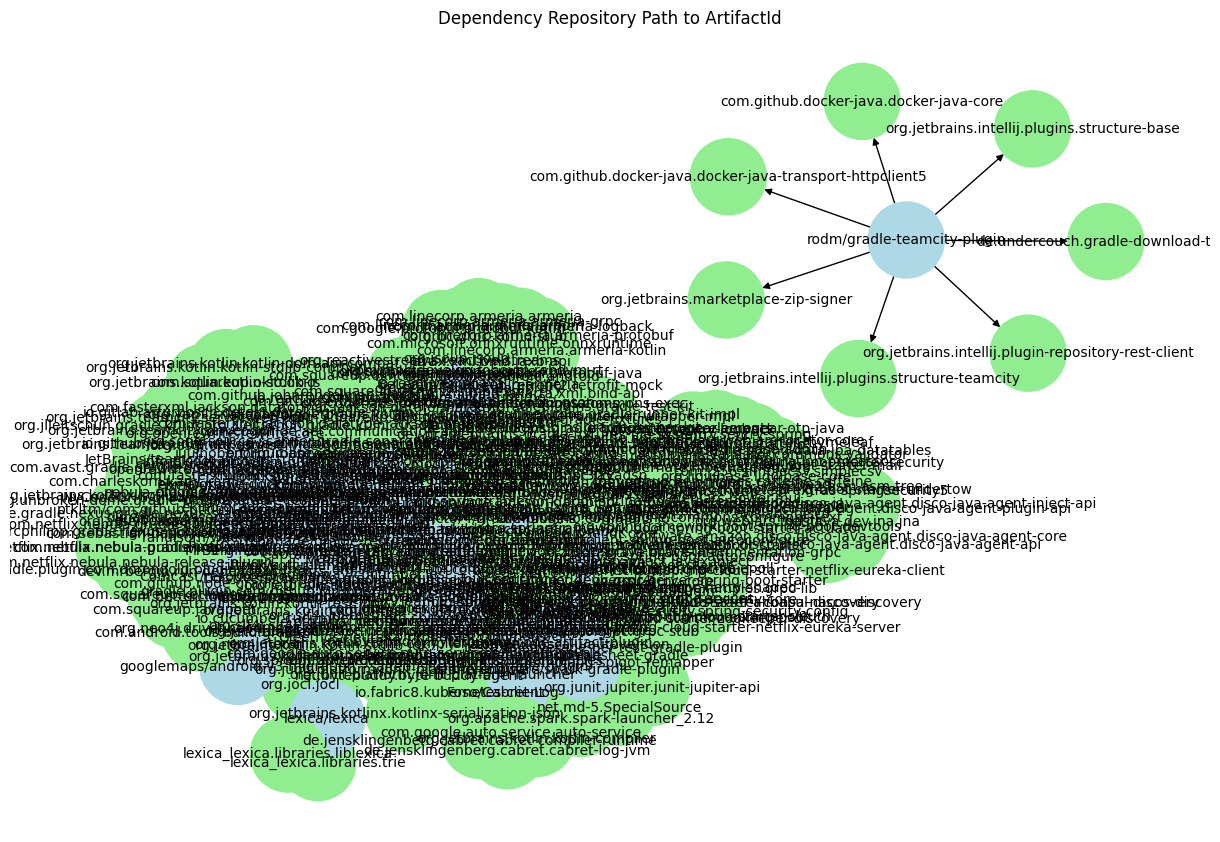

In [173]:
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

df["dependency"] = df["dependencyGroupId"] + '.' + df["dependencyArtifactId"]
# df['dependency'] = df['dependencyGroupId'] + ':' + df['dependencyArtifactId'].apply(lambda x: f'"{x}"')


G = nx.DiGraph()

node_colors = {}
for _, row in df.iterrows():
    dependency = row['dependency']
    repository_path = row['repositoryPath']
    G.add_node(dependency)
    G.add_node(repository_path)
    node_colors[dependency] = 'lightgreen'
    node_colors[repository_path] = 'lightblue'
    G.add_edge(repository_path, dependency)

plt.figure(figsize=(12, 8))
pos = graphviz_layout(G, prog='sfdp')

nx.draw(G, pos, with_labels=True, node_size=3000, node_color=[node_colors[node] for node in G.nodes()], font_size=10, font_color='black')
plt.title('Dependency Repository Path to ArtifactId')
plt.show()


Filtered dependency Graph

/var/folders/p7/r1s66l6n0rnd_bj_wbf4wb380000gn/T/ipykernel_14396/1115776928.py:41: DeprecationWarning:

nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723



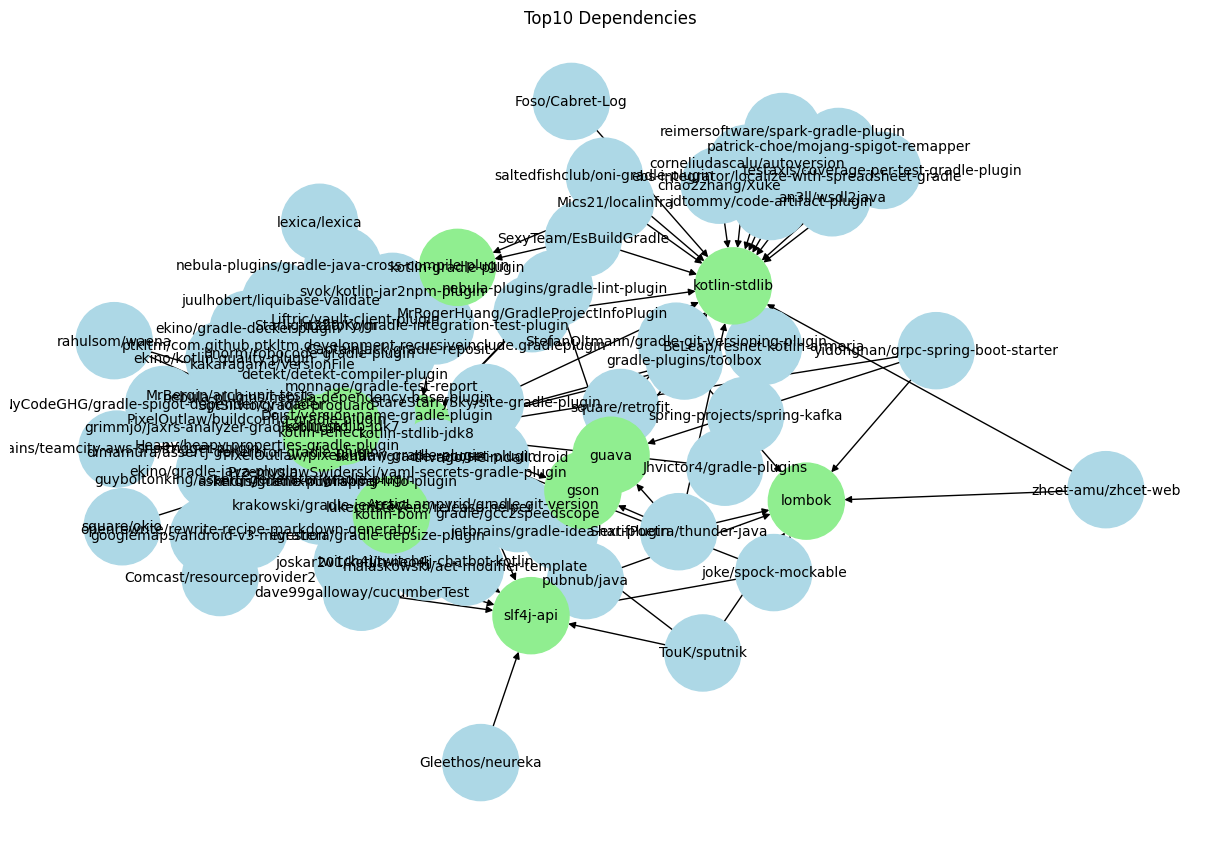

In [174]:
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

# df = df.head(100)

G = nx.DiGraph()

node_colors = {}

for _, row in df.iterrows():
    dependency_artifact_id = row['dependencyArtifactId']
    repository_path = row['repositoryPath']
    G.add_node(dependency_artifact_id)
    G.add_node(repository_path)
    node_colors[dependency_artifact_id] = 'lightgreen'
    node_colors[repository_path] = 'lightblue'
    G.add_edge(repository_path, dependency_artifact_id)

in_degrees = G.in_degree()

top_10_in_degree_nodes = [node for node, degree in sorted(in_degrees, key=lambda x: x[1], reverse=True)[:10]]


subgraph = nx.DiGraph()
for node in top_10_in_degree_nodes:
    subgraph.add_node(node)
    for predecessor in G.predecessors(node):
        subgraph.add_node(predecessor)
        subgraph.add_edge(predecessor, node)


node_colors = {}
for node in subgraph.nodes():
    if node in top_10_in_degree_nodes:
        node_colors[node] = 'lightgreen'
    else:
        node_colors[node] = 'lightblue'

plt.figure(figsize=(12, 8))
pos = graphviz_layout(G, prog='sfdp')
nx.draw(subgraph, pos, with_labels=True, node_size=3000, node_color=[node_colors[node] for node in subgraph.nodes()], font_size=10, font_color='black')
plt.title('Top10 Dependencies')
plt.show()



Another top10 libs, maximum 40 edges

/var/folders/p7/r1s66l6n0rnd_bj_wbf4wb380000gn/T/ipykernel_14396/2679364276.py:32: DeprecationWarning:

nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723



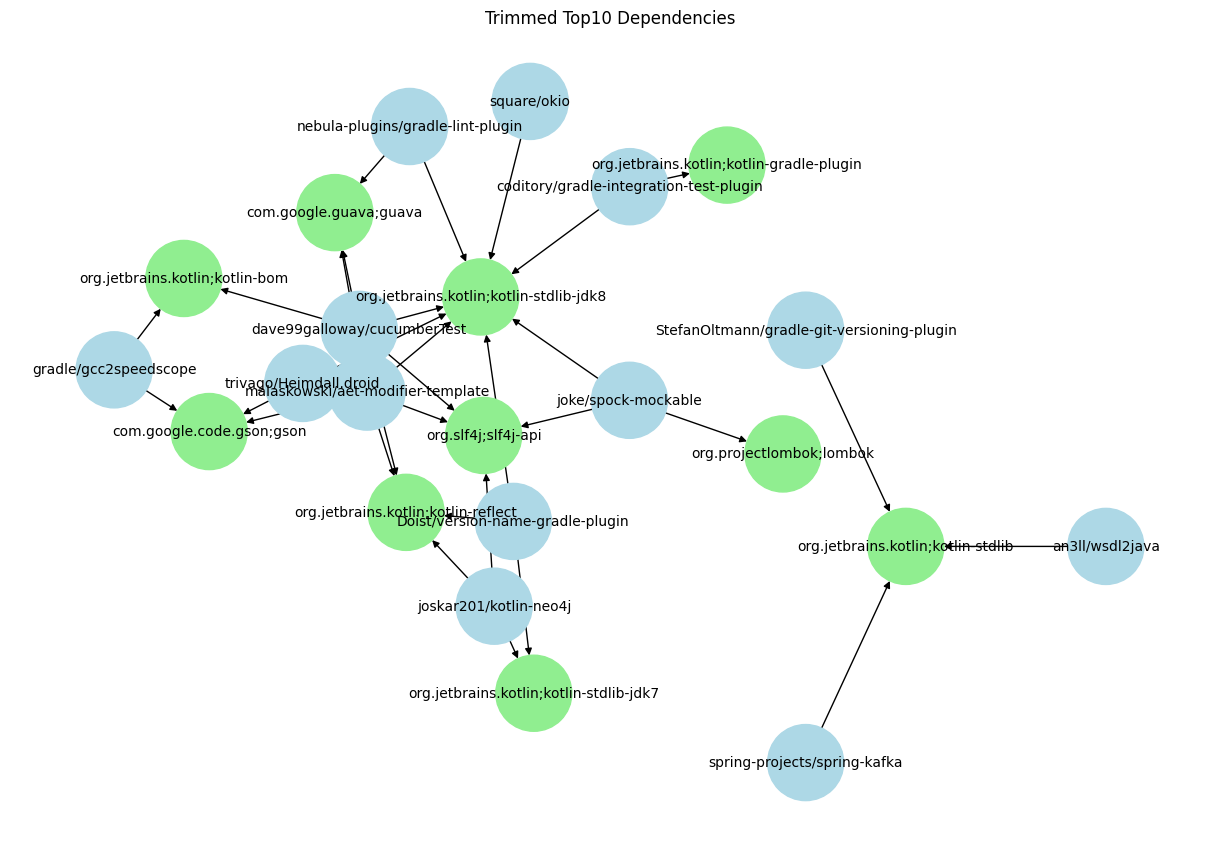

In [185]:
df["dependency"] = df["dependencyGroupId"] + ';' + df["dependencyArtifactId"]
# df["dependency"] = df["dependencyArtifactId"]

dependency_counts = df['dependency'].value_counts()

# top 10 dependencyArtifactId
top_10_dependency_ids = dependency_counts.head(10).index.tolist()

# Filter top N dependencyArtifactId rows
filtered_df = df[df['dependency'].isin(top_10_dependency_ids)]

G = nx.DiGraph()


node_colors = {}
maxEdgeCount = 30
edgecount = 0

for _, row in filtered_df.iterrows():
    dependency = row['dependency']
    repository_path = row['repositoryPath']
    G.add_node(dependency, type='lib')
    G.add_node(repository_path, type='repo')
    node_colors[dependency] = 'lightgreen'
    node_colors[repository_path] = 'lightblue'
    G.add_edge(repository_path, dependency)
    edgecount = edgecount + 1
    if edgecount > maxEdgeCount:
        break


pos = graphviz_layout(G, prog='sfdp')
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color=[node_colors[node] for node in G.nodes()], font_size=10, font_color='black')
plt.title('Trimmed Top10 Dependencies')
plt.show()


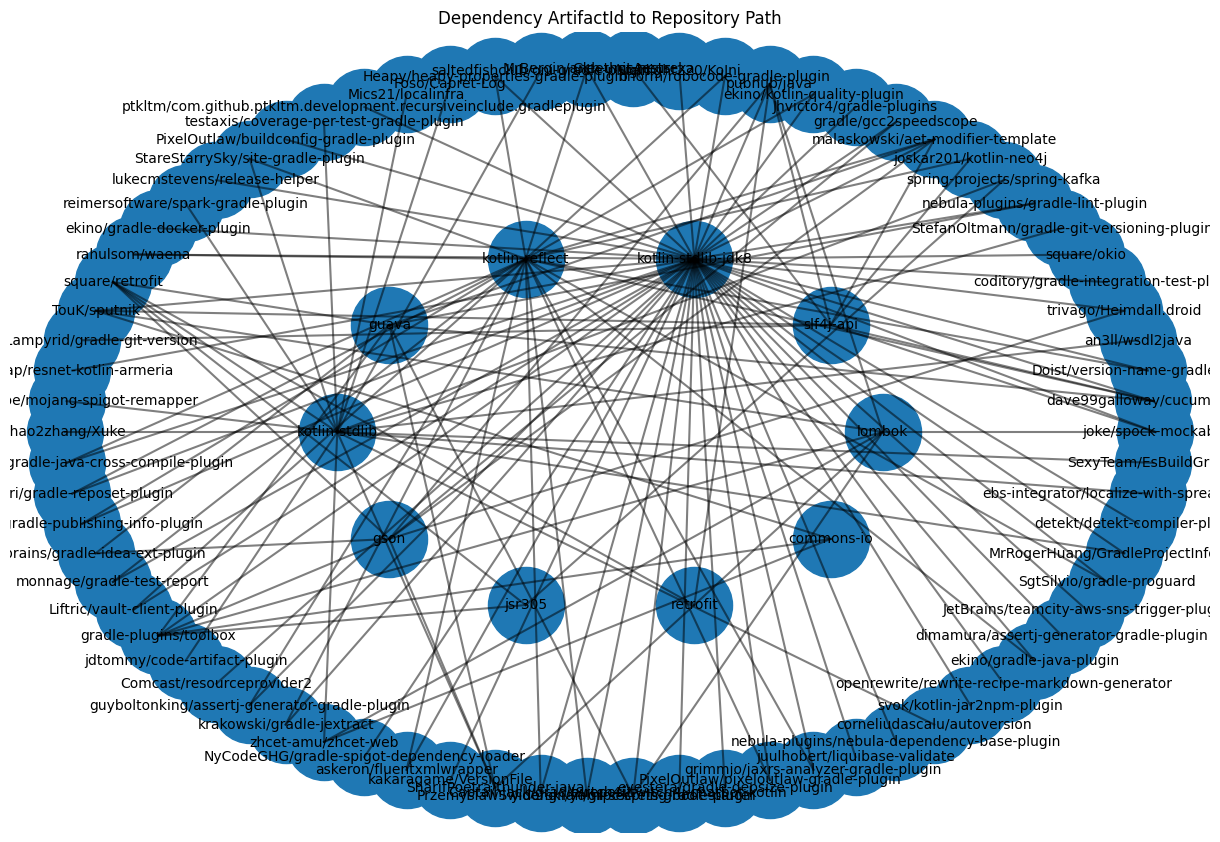

In [ ]:

dependency_counts = df['dependencyArtifactId'].value_counts()

# top 10 dependencyArtifactId
top_10_dependency_ids = dependency_counts.head(10).index.tolist()

# Filter top N dependencyArtifactId rows
filtered_df = df[df['dependencyArtifactId'].isin(top_10_dependency_ids)]

G = nx.DiGraph()

node_colors = {}
edgecount = 0
for _, row in filtered_df.iterrows():
    dependency_artifact_id = row['dependencyArtifactId']
    repository_path = row['repositoryPath']
    G.add_node(dependency_artifact_id, color='red')
    G.add_node(repository_path, color='blue')
    node_colors[dependency_artifact_id] = 'lightgreen'
    node_colors[repository_path] = 'lightblue'
    G.add_edge(repository_path, dependency_artifact_id)
    edgecount = edgecount + 1

G_repos = G.copy()

# 
G_libs = nx.DiGraph()
for node in G.nodes():
    if G.in_degree(node) > 0:
        G_repos.remove_node(node)
        G_libs.add_node(node)



circular_pos_in = nx.circular_layout(G_libs, scale=0.5, center=(0.5, 0.5))
circular_pos_out = nx.circular_layout(G_repos, scale=1, center=(0.5, 0.5))



plt.figure(figsize=(12, 8))
nx.draw(G_libs, circular_pos_in, with_labels=True, node_size=3000, font_size=10, font_color='black')
nx.draw(G_repos, circular_pos_out, with_labels=True, node_size=3000, font_size=10, font_color='black')

edges = G.edges()
pos = {**circular_pos_in, **circular_pos_out}
for edge in edges:
    plt.plot([pos[edge[0]][0], pos[edge[1]][0]], [pos[edge[0]][1], pos[edge[1]][1]], 'k-', alpha=0.5)


plt.title('Dependency ArtifactId to Repository Path')
plt.show()



Display whole graph by Graphviz 

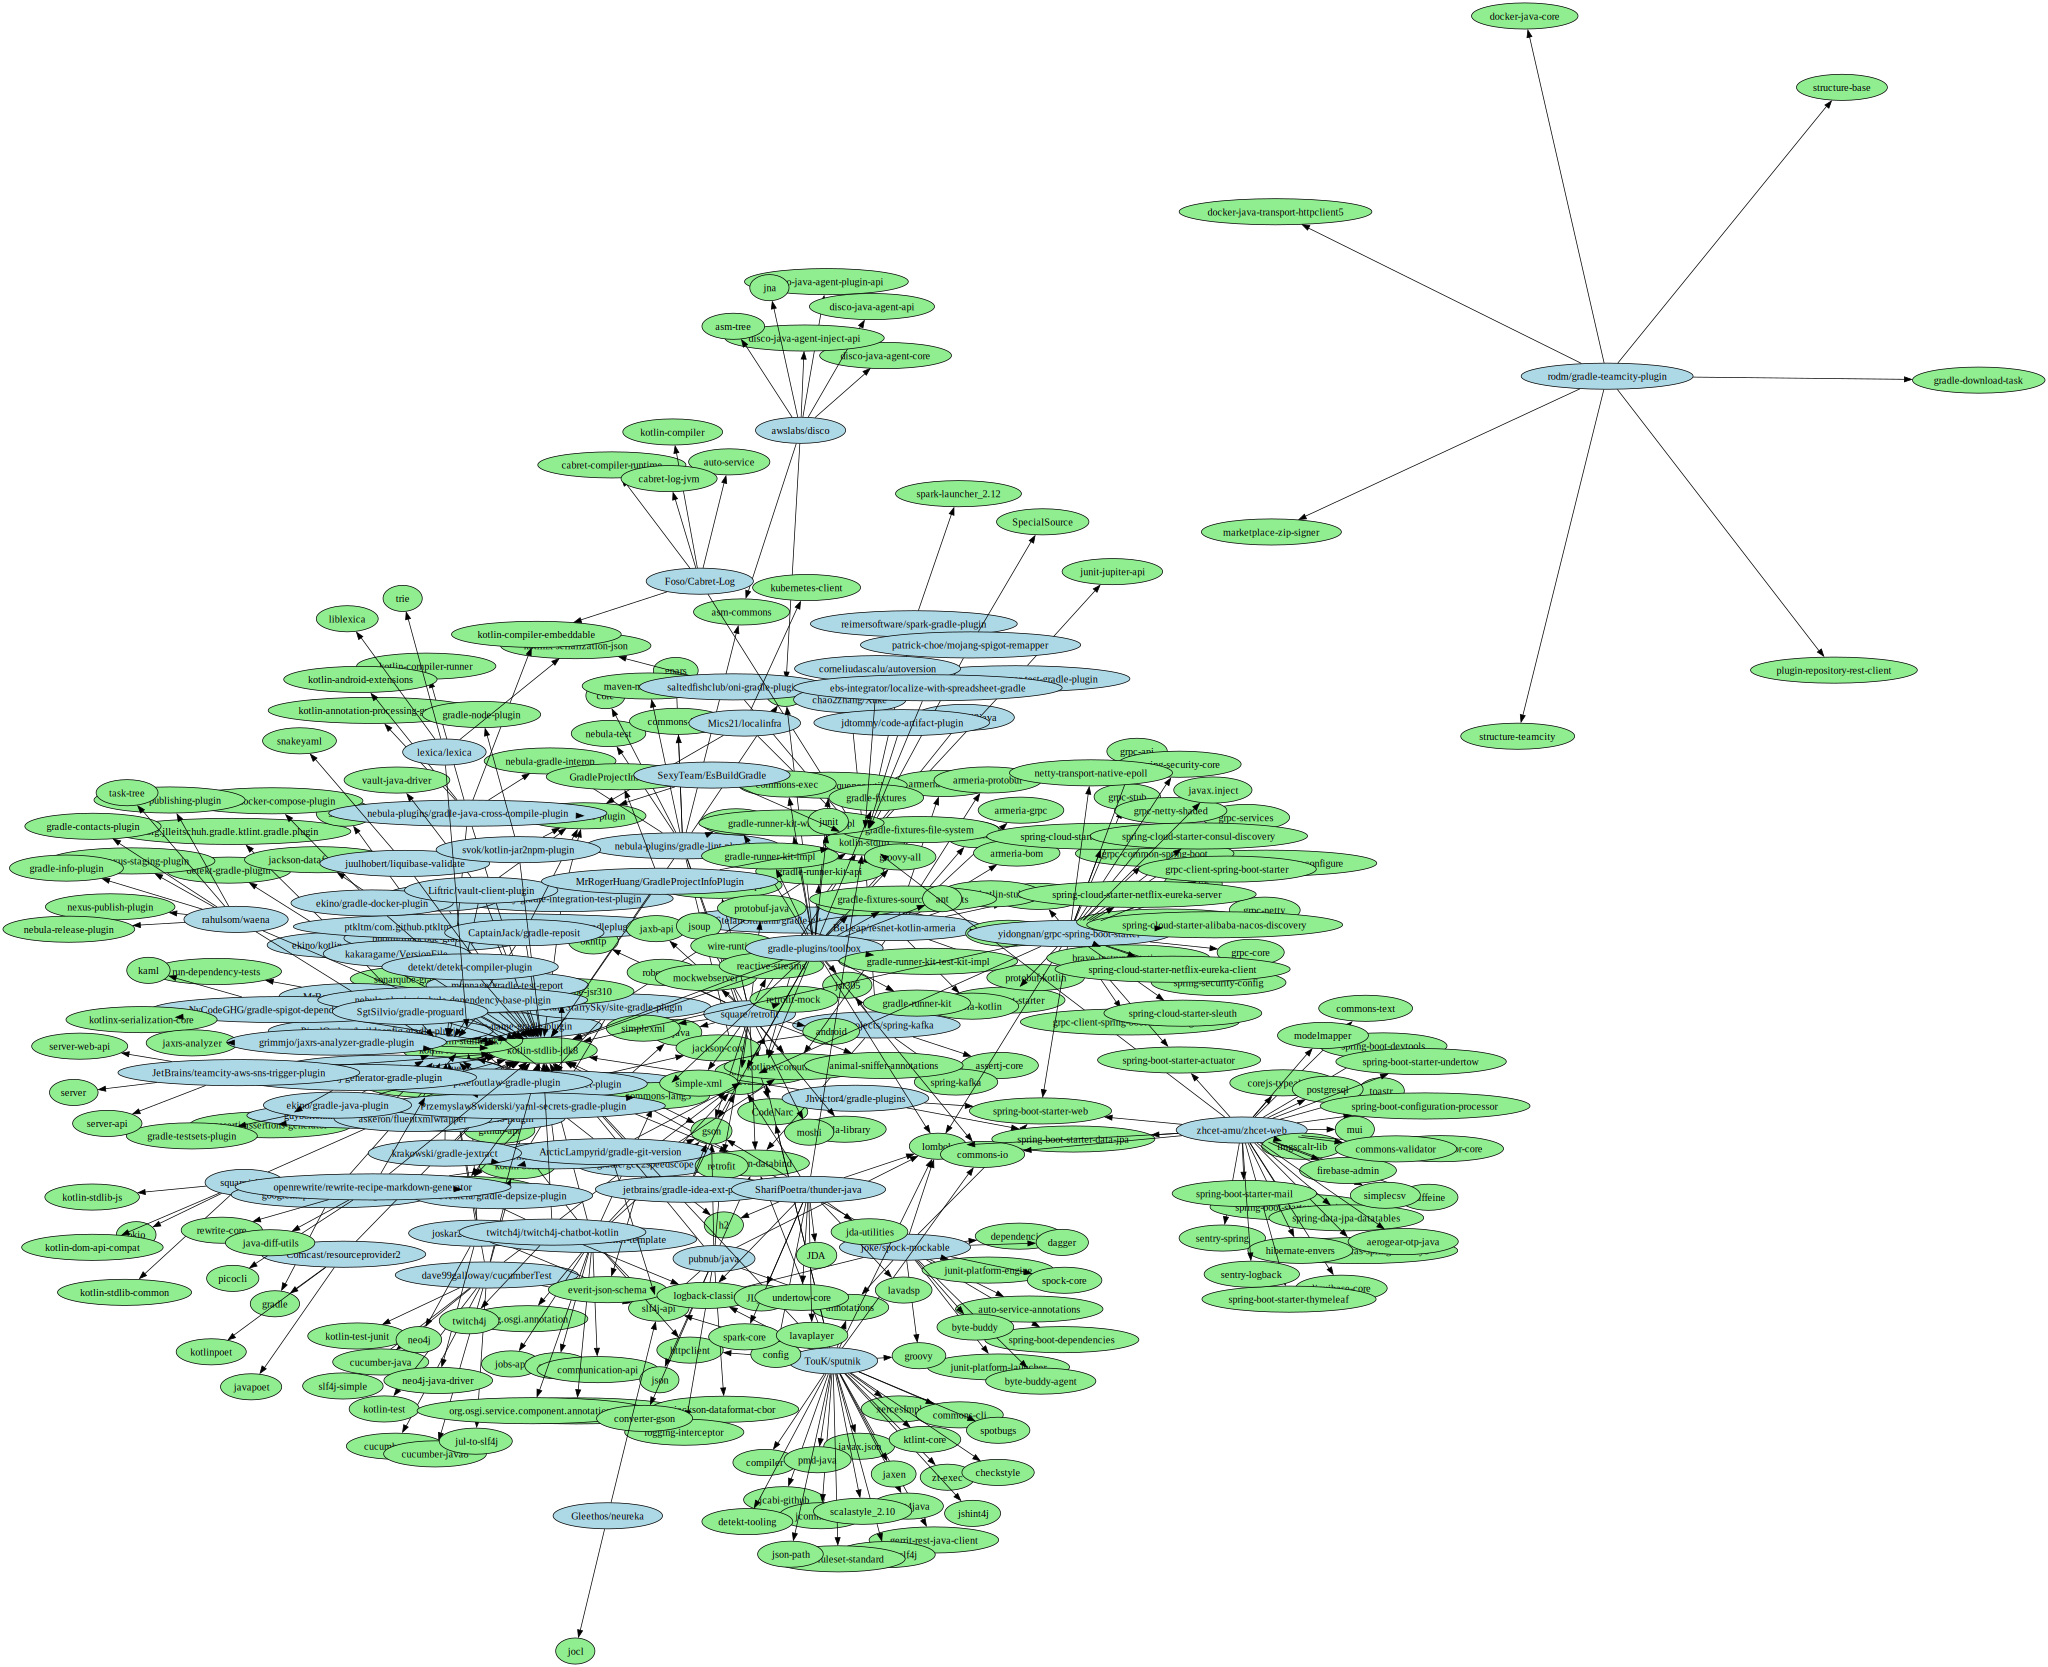

In [150]:
import graphviz
from code_data_science import data_table as dt

df = pd.read_csv("../samples/dependency-report.csv")
df = df.drop_duplicates(subset=['repositoryPath', 'dependencyArtifactId'])

graphviz.set_jupyter_format("svg")
graphviz.set_default_engine("sfdp")
dot = graphviz.Digraph("dependecies-graph", comment="Dependecies graph")

def map_repo_to_dependency(row):
    dot.node(
        row["dependencyArtifactId"],
        style="filled",
        fillcolor="lightgreen",
    )
    dot.node(
        row["repositoryPath"],
        style="filled",
        fillcolor="lightblue",
    )
    dot.edge(
        row["repositoryPath"], row["dependencyArtifactId"] , ""
    )

df.apply(map_repo_to_dependency, axis=1)

dot

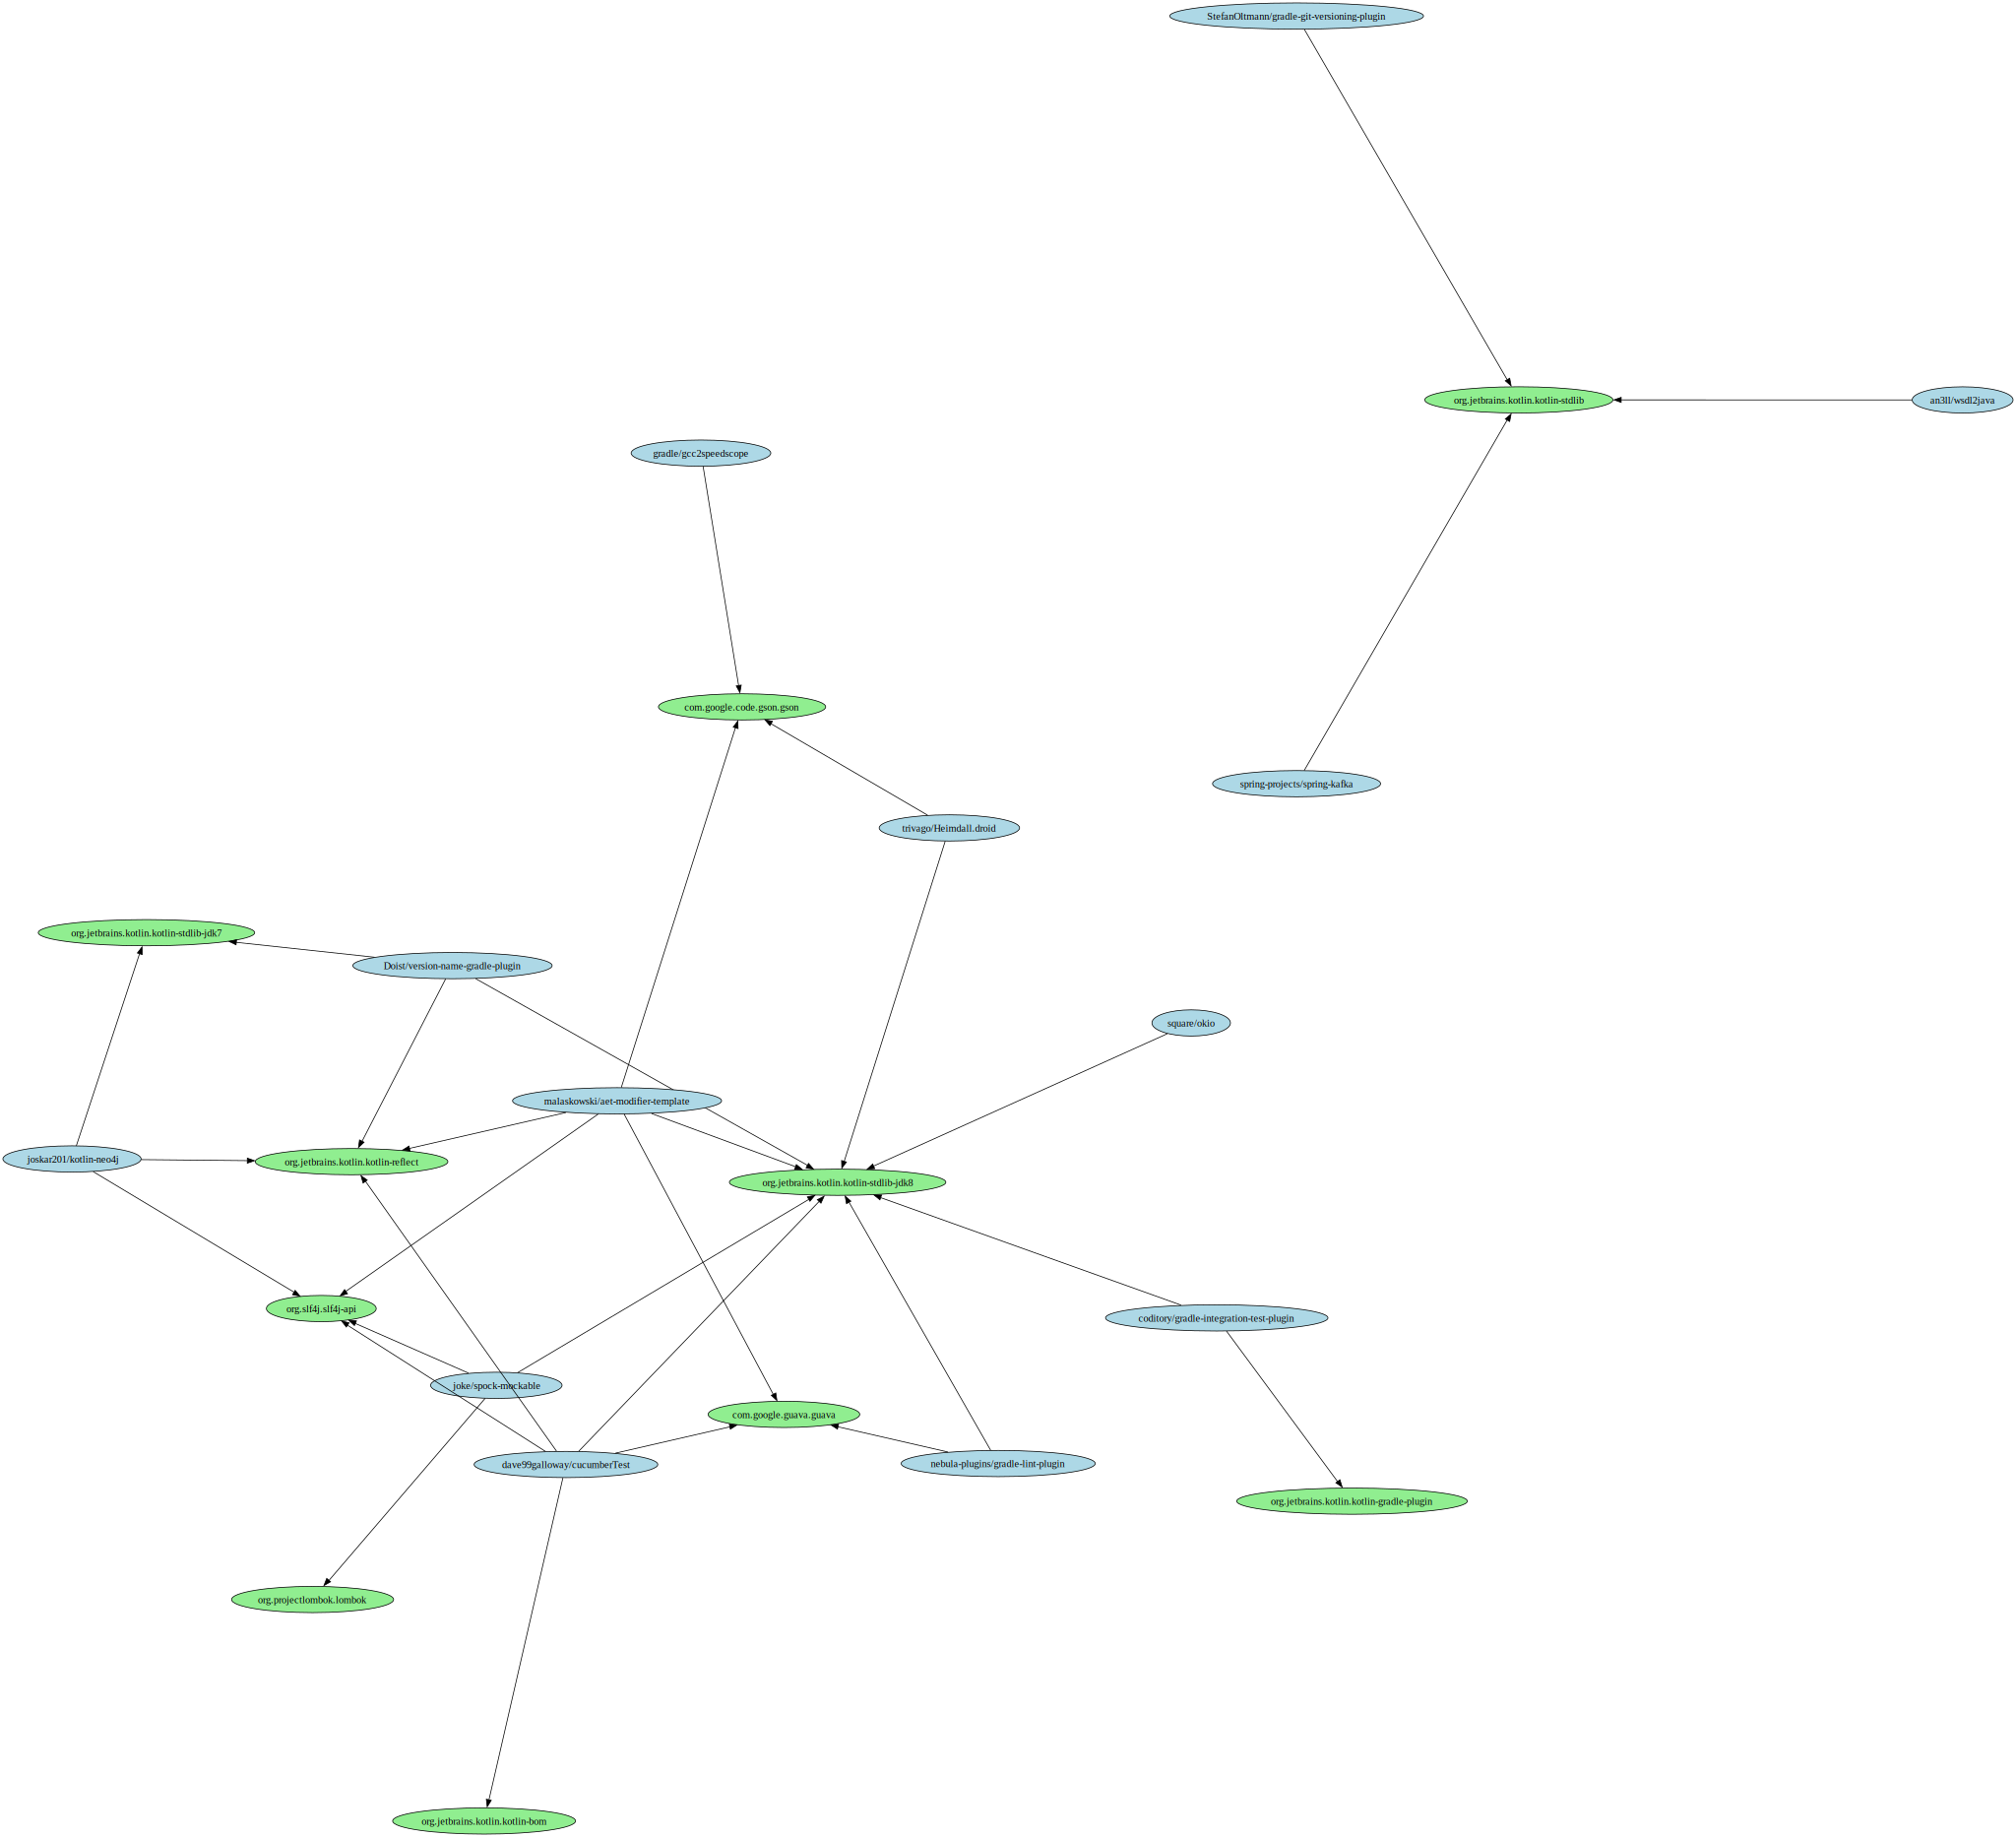

In [184]:
# top 10 in-degrees by graphviz, maximum 30 edges


import graphviz
from code_data_science import data_table as dt

df = pd.read_csv("../samples/dependency-report.csv")
df = df.drop_duplicates(subset=['repositoryPath', 'dependencyArtifactId'])

df["dependency"] = df["dependencyGroupId"] + '.' + df["dependencyArtifactId"]
# df["dependency"] = df["dependencyArtifactId"]

dependency_counts = df['dependency'].value_counts()

# top 10 dependencyArtifactId
top_10_dependency_ids = dependency_counts.head(10).index.tolist()

# Filter top N dependencyArtifactId rows
df = df[df['dependency'].isin(top_10_dependency_ids)]

graphviz.set_jupyter_format("svg")
graphviz.set_default_engine("sfdp")
dot = graphviz.Digraph("dependecies-graph", comment="Dependecies graph")

edge_count = 0

for _, row in df.iterrows():
    dot.node(row["dependency"], style="filled", fillcolor="lightgreen")
    dot.node(row["repositoryPath"], style="filled", fillcolor="lightblue")
    dot.edge(row["repositoryPath"], row["dependency"], "")
    edge_count = edge_count + 1
    if (edge_count >= 30):
        break

dot


In [213]:
import plotly.graph_objects as go

import pandas as pd

texts = ['a', ' ', 'c', ' ', 'e']
colors = ['rgb(239, 243, 255)', 'rgb(189, 215, 231)', 'rgb(107, 174, 214)',
          'rgb(49, 130, 189)', 'rgb(8, 81, 156)']
data = {'Text' : texts, 'Year' : [2010, 2011, 2012, 2013, 2014], 'Color' : colors}
df = pd.DataFrame(data)

fig = go.Figure(data=[go.Table(
  header=dict(
    values=["Text", "<b>YEAR</b>"],
    line_color='black', fill_color='white',
    align='center', font=dict(color='black', size=12)
  ),
  cells=dict(
    values=[df.Text, df.Year],
    line_color='black', fill_color=[df.Color],
    align='center', font=dict(color='black', size=11)
  ))
])

fig.show()


In [229]:
import plotly.graph_objects as go

import pandas as pd


# 生成颜色的函数
def generate_color(repository_path):
    # 使用 hashlib 计算字符串的哈希值
    hash_value = hashlib.md5(repository_path.encode()).hexdigest()
    
    # 将哈希值的一部分用作 RGB 颜色的组成部分
    r = int(hash_value[0:2], 16)
    g = int(hash_value[2:4], 16)
    b = int(hash_value[4:6], 16)
    
    # 返回颜色代码
    return f"rgb({r},{g},{b})"


df = pd.read_csv("../samples/dependency-report.csv")
df = df.drop_duplicates(subset=['repositoryPath', 'dependencyArtifactId'])
df["dependency"] = df["dependencyGroupId"] + '.' + df["dependencyArtifactId"]
df.sort_values(by=["repositoryPath", "dependencyGroupId", "dependencyArtifactId"], inplace=True)

df["color"] = df["repositoryPath"].apply(generate_color)



fig = go.Figure(data=[go.Table(
  columnwidth = [100, 80, 200, 80],
  header=dict(
    values=["Repository path", "dependencyGroupId", "dependency artifactId", "dependency version"],
    line_color='black', fill_color='lightblue',
    align='center', font=dict(color='black', size=12)
  ),
  cells=dict(
    values=[df.repositoryPath, df.dependencyGroupId, df.dependencyArtifactId, df.dependencyVersion],
    line_color='black', fill_color='white',
    align='left', font=dict(color='black', size=11)
  ))
])

fig.show()